# pyxem


### A 4-D STEM Package in the Hyperspy Ecosystem

#### Carter Francis, University of Wisconsin Madison
#### *May 16, 2024*

In [2]:
# import pyxem and hyperspy
import pyxem as pxm
import hyperspy.api as hs

### Download the Data (Try to do this ahead of time!)

In [4]:
# dowload the data :
import pooch

pxm.data.mgo_nanocrystals(allow_download=True, lazy=True)
pxm.data.zrnb_precipitate(allow_download=True, lazy=True)
pxm.data.twinned_nanowire(allow_download=True, lazy=True)
file_path = pooch.retrieve(
    url="https://zenodo.org/record/8021874/files/data_processed.zspy",
    fname="data_processed.zspy",
    path="./data/",
    known_hash="15cb8e71da39b85c32fe9bb8b53587aab15fed8b31b1e99d11c6f2061a0a0798", 
    progressbar=True
)



100%|█████████████████████████████████████| 58.3M/58.3M [00:00<00:00, 72.2GB/s]


# Outline

1. Introduction to 4D STEM
2. Introduction to pyxem
3. Example Workflows
    1. Loading and Visualizing Data (This Notebook)
    2. Creating Virtual Images (MgO Nanocrystals) (This Notebook)
    3. Strain Mapping and Finding Vectors (Inclusions in ZrNb) (30 min) 
    4. Azimuthal Integration And Orientation Mapping in Molecular Glasses (30 min)

# Introduction to 4D STEM

<img src="Images/4DSTEM.gif" alt="4D STEM GIF">

# Introduction to pyxem (pix-em)


Because pyxem extends hyperspy importing hyperspy will automatically load pyxem if it is installed.

This also means that we inherit all of the upstream hyperspy functionality such as:

1. Fast I-O (from [many different file formats](https://hyperspy.org/rosettasciio/supported_formats/index.html))
2. Machine learning with [Matrix Factorization](https://hyperspy.org/hyperspy-doc/current/user_guide/mva.html)
3. Fitting with [1-D and 2-D functions](https://hyperspy.org/hyperspy-doc/current/user_guide/model.html)
4. [Interactive Plotting](https://hyperspy.org/hyperspy-doc/current/user_guide/visualisation.html)
5. [Metadata Handling](https://hyperspy.org/hyperspy-doc/current/user_guide/metadata_structure.html)
6. And __Much Much__ More!

For more information about pyxem check out our [github](https://github.com/pyxem/pyxem) our [documentation](https://pyxem.readthedocs.io/en/latest/) or the set of [tutorial notebooks](https://github.com/pyxem/pyxem-demos) or our new set of [examples](https://pyxem.readthedocs.io/en/stable/examples/index.html)

## Loading and Visualizing Data

Data in `pyxem` can be loaded exactly the same as loading data in `hyperspy`.  Many different formats are supported but only the `.hspy` (hdf5) and `.zspy` (zarr) formats retain all of the metadata

```python
import hyperspy.api as hs
s = hs.load("path/to/file/to/load.hspy")
```

Visualization can easily be done by then calling the function

```python
s.plot()
```


In [6]:
# Starting up a distributed Cluster locally 
# You don't have to do this but it helps to visualize what is happening. Note that you can 
from dask.distributed import Client
client = Client()  # set up local cluster on your laptop
client
# Ignore INFO below just giving informataion about the scheduler set up

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.diskutils:Found stale lock file and directory '/var/folders/zs/ggjk5_sn2yjgjq4_l93t8__r0000gn/T/dask-scratch-space/scheduler-plce2awm', purging
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:60044
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:60047'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:60048'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:60049'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:60050'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:60056', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:60056
INFO:distrib

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:60044,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:60055,Total threads: 2
Dashboard: http://127.0.0.1:60060/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:60047,


In [7]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:60044,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:60055,Total threads: 2
Dashboard: http://127.0.0.1:60060/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:60047,


In [2]:
import pyxem as pxm
import hyperspy.api as hs
hs.set_log_level("ERROR")

In [3]:
# setting the plotting backend (note this works much better with the qt backend!)

## Creating Virtual Images
We can construct Virtual images very easily using [ROIS](http://hyperspy.org/hyperspy-doc/current/user_guide/interactive_operations_ROIs.html) from `hyperspy`.

In [3]:
import hyperspy
print(hyperspy.__version__)

2.1.0


In [4]:
# This will work with lazy signals if they are small and stored efficiently.


[########################################] | 100% Completed | 876.23 ms


In [5]:
# plot the data


In [6]:
# Lets make an couple of interactive ROI's 


([RectangularROI(left=-2.33712, top=-2.33712, right=-1.56349, bottom=-1.56349),
  RectangularROI(left=-1.56349, top=-1.56349, right=-0.78986, bottom=-0.78986),
  RectangularROI(left=-0.78986, top=-0.78986, right=-0.01623, bottom=-0.01623)],
 [<Signal2D, title: Integrated intensity, dimensions: (|105, 105)>,
  <Signal2D, title: Integrated intensity, dimensions: (|105, 105)>,
  <Signal2D, title: Integrated intensity, dimensions: (|105, 105)>])

We can also define a specific ROI to create virtual Images.

In [7]:
# get the mean diffraction pattern
# plot the mean diffraction pattern
# create a ROI to be used as a virtual appature
# add roi to plot
# create a ROI to be used as a virtual appature
# add roi to plot

In [8]:
# get the integrated intensity to make the virtual images.
# integrate the DF ROI 
# integrate the DF ROI  using `.get_integrated_intensity`


# plot_images
# Plot both ROI's using hyperspy

[<Axes: title={'center': 'Virtual Dark Field'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>,
 <Axes: title={'center': 'Virtual Aperture'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>]

### Finding Diffraction Vectors and Crystal Segmentation

For many operations in `pyxem` such as Crystal Segmentation, Strain Mapping and Clustering we start with finding the set of diffraction vectors within the dataset.  This starts with the function `s.get_diffraction_vectors()`

##### Removing Background

For more infromation look at the [background subtraction example](https://pyxem.readthedocs.io/en/stable/examples/processing/background_subtraction.html#sphx-glr-examples-processing-background-subtraction-py)

In [4]:
# Restart Kernel

In [66]:
import pyxem as pxm
import hyperspy.api as hs
hs.set_log_level("ERROR")

In [2]:
# load data

In [17]:
# find peaks using difference of gaussians  (try min_sigma= 2 max_sigma=4, threshold=0.02)

WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:5320)


In [65]:
%matplotlib ipympl
#plot the markers over the dataset

WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:5320)


[########################################] | 100% Completed | 106.28 ms


In [ ]:
# compute the diffraction vectors

In [5]:
# plot the map (number found) of diffraction vectors 


In [ ]:
import numpy as np

distance_threshold = 0.1
min_samples = 7
# cluster the vectors to get only the unique vectors

#remove the zero beam min_magnitude=.4



### Creating Virtual Images from Vectors

[########################################] | 100% Completed | 658.76 ms


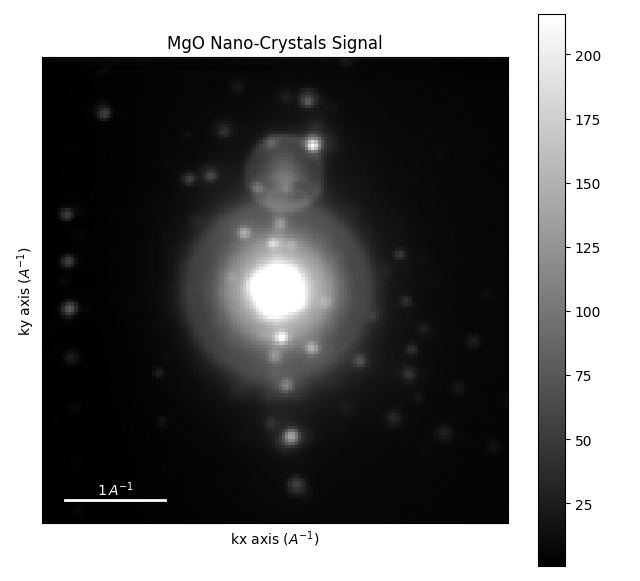

In [64]:
# peaks to rois (include_labels=True)


In [ ]:
# display the vdfs object


In [56]:
# plot the vdfs (lazily)


[########################################] | 100% Completed | 219.12 ms


In [76]:
# compute VDFS


[########################################] | 100% Completed | 4.37 sms


### Creating Segmented Detectors

In [79]:
import pyxem as pxm
from pyxem.utils._azimuthal_integrations import _get_control_points
import numpy as np
import hyperspy.api as hs

dp.calibration.center = None  # Center the diffraction patterns


# For Visualizing the virtual detector
cp = _get_control_points(
    1,
    npt_azim=8,
    radial_range=(1, 2),
    azimuthal_range=(-np.pi, np.pi),
    affine=dp.calibration.affine,
)[:, :, ::-1]

poly = hs.plot.markers.Polygons(verts=cp, edgecolor="w", facecolor="none")
dp.plot()
dp.add_marker(poly)
pos = np.mean(cp, axis=1)
texts = np.arange(len(pos)).astype(str)
texts = hs.plot.markers.Texts(offsets=pos, texts=texts, color="w")
dp.add_marker(texts)

In [85]:
# Create a 2D Azimuthal Integral and plot the transpose


[########################################] | 100% Completed | 103.27 ms


In [90]:
# Createa 1D Azimuthal Integral and plot the transpose
